In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("../data/btcusdt.csv")
df

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2022-07-14 14:42:00,19970.23,19976.38,19961.92,19969.78,54.23882,1657780979999,1.083113e+06,2086,25.42902,5.078110e+05,0
1,2022-07-14 14:43:00,19969.78,19988.07,19966.83,19981.67,76.44766,1657781039999,1.527254e+06,2569,42.97334,8.585345e+05,0
2,2022-07-14 14:44:00,19979.52,20001.43,19977.89,20000.75,76.81600,1657781099999,1.535827e+06,2402,41.71792,8.341394e+05,0
3,2022-07-14 14:45:00,19998.08,20054.66,19998.07,20041.96,231.96826,1657781159999,4.646698e+06,5870,142.64732,2.857418e+06,0
4,2022-07-14 14:46:00,20041.96,20064.88,20033.21,20036.43,138.45879,1657781219999,2.775858e+06,3948,73.39213,1.471429e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-15 23:56:00,20851.75,20854.06,20830.30,20839.44,59.04577,1657900619999,1.230599e+06,2489,30.08875,6.271038e+05,0
1996,2022-07-15 23:57:00,20841.31,20842.00,20812.00,20814.05,56.00447,1657900679999,1.166369e+06,2358,24.57709,5.118785e+05,0
1997,2022-07-15 23:58:00,20814.05,20817.98,20783.89,20788.67,246.16047,1657900739999,5.119846e+06,4757,99.75851,2.074993e+06,0
1998,2022-07-15 23:59:00,20785.52,20803.22,20777.00,20792.19,110.59637,1657900799999,2.299633e+06,3442,59.21621,1.231400e+06,0


The trading strategy is simple:
- Long the stock if the shorter SMA > longer SMA
- Short  the stock if the shorter SMA < longer SMA

In [3]:
short_sma = 30
long_sma = 240

In [4]:
df['SMA1'] = df['Close'].rolling(short_sma).mean()
df['SMA2'] = df['Close'].rolling(long_sma).mean()
# drop the rows with NaN entries
df.dropna(inplace=True)
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,SMA1,SMA2
239,2022-07-14 18:41:00,19819.83,19852.41,19802.00,19824.08,254.56426,1657795319999,5.047963e+06,5258,130.66956,2.591517e+06,0,19797.650667,19888.350583
240,2022-07-14 18:42:00,19824.08,19836.97,19820.64,19830.71,82.39661,1657795379999,1.633746e+06,2641,39.34827,7.801870e+05,0,19798.894000,19887.771125
241,2022-07-14 18:43:00,19830.71,19836.68,19818.69,19825.45,54.81905,1657795439999,1.086881e+06,2104,27.48304,5.449191e+05,0,19800.099000,19887.120208
242,2022-07-14 18:44:00,19823.61,19831.69,19811.20,19827.66,62.91445,1657795499999,1.247087e+06,1951,35.24781,6.987451e+05,0,19800.763333,19886.399000
243,2022-07-14 18:45:00,19826.32,19845.06,19809.15,19838.40,98.52746,1657795559999,1.953348e+06,3105,55.58063,1.102057e+06,0,19803.275333,19885.550833


In [5]:
df['Position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)

In [6]:
df

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,SMA1,SMA2,Position
239,2022-07-14 18:41:00,19819.83,19852.41,19802.00,19824.08,254.56426,1657795319999,5.047963e+06,5258,130.66956,2.591517e+06,0,19797.650667,19888.350583,-1
240,2022-07-14 18:42:00,19824.08,19836.97,19820.64,19830.71,82.39661,1657795379999,1.633746e+06,2641,39.34827,7.801870e+05,0,19798.894000,19887.771125,-1
241,2022-07-14 18:43:00,19830.71,19836.68,19818.69,19825.45,54.81905,1657795439999,1.086881e+06,2104,27.48304,5.449191e+05,0,19800.099000,19887.120208,-1
242,2022-07-14 18:44:00,19823.61,19831.69,19811.20,19827.66,62.91445,1657795499999,1.247087e+06,1951,35.24781,6.987451e+05,0,19800.763333,19886.399000,-1
243,2022-07-14 18:45:00,19826.32,19845.06,19809.15,19838.40,98.52746,1657795559999,1.953348e+06,3105,55.58063,1.102057e+06,0,19803.275333,19885.550833,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-15 23:56:00,20851.75,20854.06,20830.30,20839.44,59.04577,1657900619999,1.230599e+06,2489,30.08875,6.271038e+05,0,20854.967667,20905.344500,-1
1996,2022-07-15 23:57:00,20841.31,20842.00,20812.00,20814.05,56.00447,1657900679999,1.166369e+06,2358,24.57709,5.118785e+05,0,20852.337333,20905.556375,-1
1997,2022-07-15 23:58:00,20814.05,20817.98,20783.89,20788.67,246.16047,1657900739999,5.119846e+06,4757,99.75851,2.074993e+06,0,20849.683000,20905.641250,-1
1998,2022-07-15 23:59:00,20785.52,20803.22,20777.00,20792.19,110.59637,1657900799999,2.299633e+06,3442,59.21621,1.231400e+06,0,20847.222667,20905.734792,-1


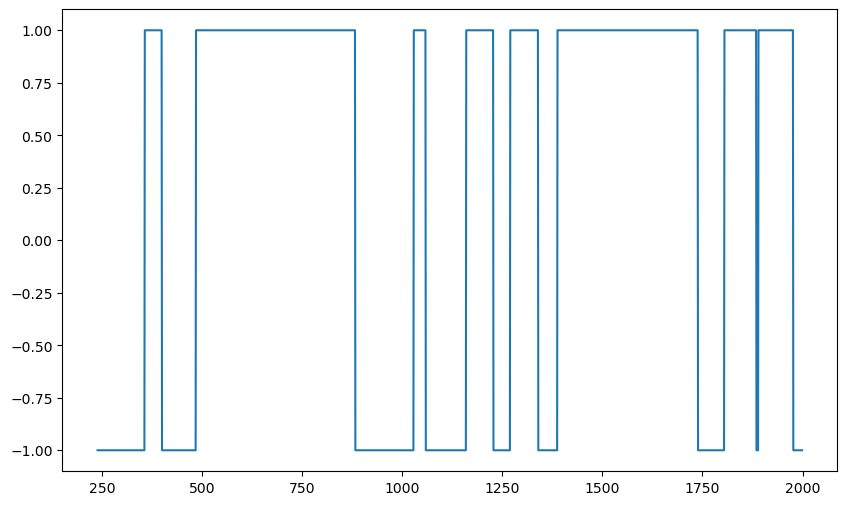

In [7]:
ax = df['Position'].plot(figsize=(10,6))

## Machine Learning Approach: Classification

Another strategy is that we compute the log returns for each consecutive timestamps.

In [8]:
df = pd.read_csv("../data/btcusdt.csv")
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2022-07-14 14:42:00,19970.23,19976.38,19961.92,19969.78,54.23882,1657780979999,1.083113e+06,2086,25.42902,5.078110e+05,0
1,2022-07-14 14:43:00,19969.78,19988.07,19966.83,19981.67,76.44766,1657781039999,1.527254e+06,2569,42.97334,8.585345e+05,0
2,2022-07-14 14:44:00,19979.52,20001.43,19977.89,20000.75,76.81600,1657781099999,1.535827e+06,2402,41.71792,8.341394e+05,0
3,2022-07-14 14:45:00,19998.08,20054.66,19998.07,20041.96,231.96826,1657781159999,4.646698e+06,5870,142.64732,2.857418e+06,0
4,2022-07-14 14:46:00,20041.96,20064.88,20033.21,20036.43,138.45879,1657781219999,2.775858e+06,3948,73.39213,1.471429e+06,0


In [9]:
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)
df['direction'] = np.sign(df['returns']).astype(int)

In [10]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, 3):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
    print('The following columns have been added: \n')
    print(cols)

In [11]:
create_lags(df)

The following columns have been added: 

['lag_1', 'lag_2']


In [12]:
df.dropna(inplace=True)

In [13]:
split = int(len(df) * 0.80)

In [14]:
train = df.iloc[:split].copy()
train.shape

(1597, 16)

In [15]:
def z_scaler(data):
    """
    Rescaling the data to reasonable interval

    Arg:
     data:  ndarray (n,)
    """
    mu = np.mean(data)
    stddev = np.sqrt(np.var(data))
    return (data - mu) / stddev

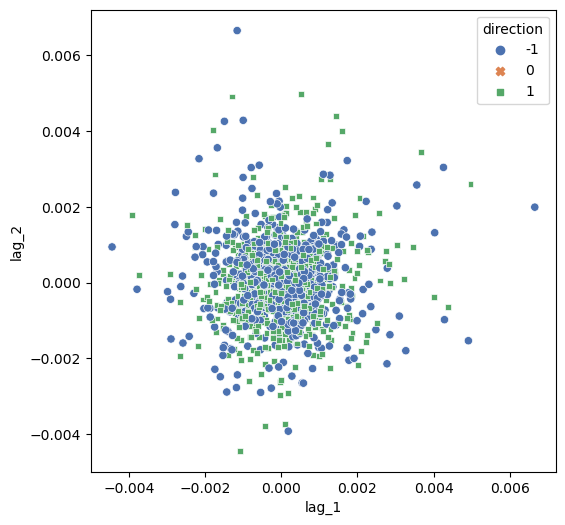

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(6,6))
fig = sns.scatterplot(data=train, x="lag_1", y="lag_2", hue="direction", style="direction", palette="deep")

For our logistic regression model, 

$$
z = \overrightarrow{w} \cdot \overrightarrow{x} + b
$$

In [17]:
def sigmoid(z):
    g = 1 / (1 + np.exp(np.negative(z)))
    return g

In [18]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    
    z = np.matmul(X,w) + b
    f_wb = sigmoid(z)
    # print(f_wb)
    total_cost = 0

    for i in range(m):
        loss = -y[i] * math.log(f_wb[i]) - (1 - y[i]) * math.log(1 - f_wb[i])
        total_cost += np.sum(loss)
    
    total_cost /= m

    return total_cost

In [19]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    z = np.matmul(X,w) + b
    f_wb = sigmoid(z)
    dj_db = 1 / m * np.sum(f_wb - y)
    
    b_i = 0.
    dj_dw = np.dot(1/m, np.matmul(np.transpose(X), f_wb - y))
        
    return dj_db, dj_dw

In [20]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [21]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)

    reg_cost = 0.
    reg_cost = np.sum(np.square(w))
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [22]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    dj_dw = dj_dw + np.dot(lambda_ / m, w)
    
    return dj_db, dj_dw

From the raw features data, we transformed into a polynomial with terms $x_1$ and $x_2$, 
which represents `lag_1` and `lag_2` respectively.

$$
y = w_1 x_1 + w_2 x_2 + w_3 x_1^2 + \cdots + w_n x_1^7 x_2^8
$$

In [23]:
def map_feature(X1, X2):
    """
    Map features using polynomial with degree=8 
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 8
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [24]:
X_mapped = map_feature(train.lag_1, train.lag_2)
X_mapped

array([[ 9.54419540e-04,  5.95222469e-04,  9.10916658e-07, ...,
         4.05092820e-26,  2.52635595e-26,  1.57555851e-26],
       [ 2.05830297e-03,  9.54419540e-04,  4.23661113e-06, ...,
         3.20224485e-24,  1.48485674e-24,  6.88516855e-25],
       [-2.75959191e-04,  2.05830297e-03,  7.61534749e-08, ...,
         5.79089293e-24, -4.31926623e-23,  3.22162075e-22],
       ...,
       [ 3.68753408e-04,  7.30981056e-05,  1.35979076e-07, ...,
         2.07447791e-32,  4.11224418e-33,  8.15171476e-34],
       [ 1.10592209e-03,  3.68753408e-04,  1.22306368e-06, ...,
         3.07514304e-27,  1.02536108e-27,  3.41891526e-28],
       [ 1.32244505e-03,  1.10592209e-03,  1.74886090e-06, ...,
         3.19965000e-24,  2.67577366e-24,  2.23767121e-24]])

In [25]:
# Initialize fitting parameters
np.random.seed(42)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

y_train = train.direction.to_numpy()

w,b, J_history,_ = gradient_descent(z_scaler(X_mapped), y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     1.71   
Iteration 1000: Cost     0.17   
Iteration 2000: Cost     0.11   
Iteration 3000: Cost     0.09   
Iteration 4000: Cost     0.08   
Iteration 5000: Cost     0.08   
Iteration 6000: Cost     0.07   
Iteration 7000: Cost     0.07   
Iteration 8000: Cost     0.07   
Iteration 9000: Cost     0.07   
Iteration 9999: Cost     0.07   


In [26]:
w

array([-0.13065893, -0.24283007,  0.20943964,  0.14689306, -0.3448145 ,
       -0.3080252 , -0.40584829,  0.40179241,  0.13685223,  0.24372934,
       -0.4433275 ,  0.50540348,  0.36802272, -0.25169331, -0.28218792,
       -0.28060936, -0.15984727,  0.06052889, -0.03222443, -0.17285223,
        0.14757083, -0.32449252, -0.17193729, -0.09776655, -0.00811457,
        0.3207854 , -0.26435027,  0.05001348,  0.12814467, -0.41747772,
        0.14326548, -0.29348168, -0.39888819,  0.4843925 ,  0.50112851,
        0.34399225, -0.15947597, -0.36628809,  0.21990565, -0.02402209,
       -0.34193722,  0.03096788, -0.42953207,  0.44485213])

In [27]:
def plot_decision_boundary(ax, w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        ax.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-8, 8, 200)
        v = np.linspace(-8, 8, 200)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        ax.contour(u,v,z, levels = [0.45], colors="g")

/tmp/ipykernel_5147/3679780729.py:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(np.negative(z)))


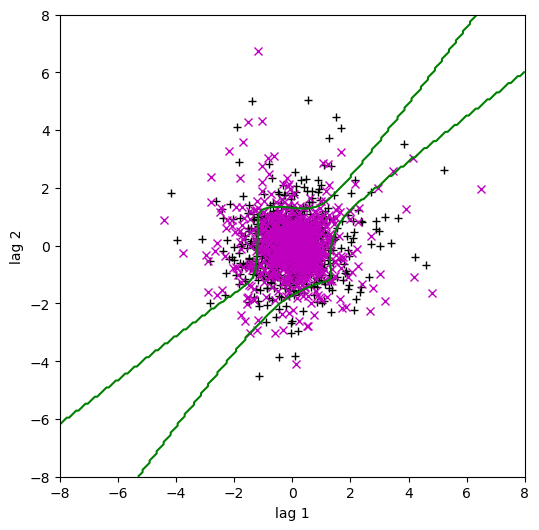

In [28]:
is_positive = train[train['direction'] > 0]
is_negative = train[train['direction'] <= 0]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(z_scaler(is_positive['lag_1']), z_scaler(is_positive['lag_2']), 'k+')
ax.plot(z_scaler(is_negative['lag_1']), z_scaler(is_negative['lag_2']), 'mx')
plt.xlabel('lag 1')
plt.ylabel('lag 2')
plot_decision_boundary(ax, w, b, z_scaler(X_mapped), y_train)